# NYC New Measles Cases by Month (2018 - 2019)

* This Jupyter/Python notebook creates a bar chart of the 2018-2019 NYC New Measles Cases by Month.
* This notebook is part of the [Visualizing the 2019 Measles Outbreak](https://carlos-afonso.github.io/measles/) GitHub project, under [MIT License](https://github.com/carlos-afonso/measles/blob/master/LICENSE).
* [Carlos Afonso](https://www.linkedin.com/in/carlos-afonso-w/), October 29, 2019.

## Import Libraries

In [1]:
# Import the necessary libraries/modules
from datetime import datetime
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os
import pandas as pd

## Import Data

The data has been manually collected/updated from the source ([NYC Health Measles webpage](https://www1.nyc.gov/site/doh/health/health-topics/measles.page)) and saved as a [CSV file](https://github.com/carlos-afonso/measles/blob/master/data/nyc-new-measles-cases-by-month.csv). We use this manual approach because the data is small and updated infrequently (usually once a week).

In [2]:
# Set (relative) path to the CSV data file
#data_file = '../data/nyc-new-measles-cases-by-month.csv'
data_file = '../data/nyc-health/final/nyc-new-measles-cases-by-month.csv'

# Import data from the CSV file as a pandas dataframe
df = pd.read_csv(data_file)

## Extract Data

Extract and transform the data necessary to create the bar chart.

Each row in the dataframe is a data update. We want the latest data which is the last row in the dataframe.

In [3]:
# Show the latest data (last row in the dataframe)
df.tail(1)

,Start Date,End Date,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Total
0,2018-09-01,2019-08-19,1,13,28,14,37,71,169,193,97,20,6,0,649


We want to show the start and end dates in the plot, to provide context. So, let's extract these two dates from the dataframe (last row, first two columns) and transform them into nicelly formatted strings.

In [4]:
# Notes about the lambda function below:
# - 1. The strptime operation transforms the raw date string to a datetime object;
# - 2. The strftime operation transforms the datetime object to a nicelly formatted date string;
# - 3. The replace operation removes any leading zeros.
[start_date, end_date] = map(
    lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%b %d, %Y').replace(' 0', ' '),
    df.iloc[-1, :2]
)

# Show the nicelly formated date strings
[start_date, end_date]

['Sep 1, 2018', 'Aug 19, 2019']

We also want to show the total number of cases in the plot, to provide context.

In [5]:
# Get the number of total cases (last row, last column)
total_cases = df.iloc[-1, -1]

# Check if there is a problem with the data where the reported total
# does not match the sum of the number of cases for each age group
if total_cases != df.iloc[-1, 2:-1].sum():
    print('WARNING: cases for each age group do NOT add up to the reported total!')

total_cases

649

Finally, lets extract the data to actually plot (last row, third to penultimate columns).

In [6]:
# Extract the data to plot (last row, third to penultimate columns)
# Call it 'd2p' as an abbrevation for 'data to plot'
d2p = df.iloc[-1, 2:-1]
d2p

Sep 2018      1
Oct 2018     13
Nov 2018     28
Dec 2018     14
Jan 2019     37
Feb 2019     71
Mar 2019    169
Apr 2019    193
May 2019     97
Jun 2019     20
Jul 2019      6
Aug 2019      0
Name: 0, dtype: object

Create nicely formatted month labels to be used in the bar chart.

In [7]:
# Get the 'raw' month labels
month_labels = list(d2p.index)

# For the first and last month: show month and year but
# replace the space between the month and year with a line break
first_label = month_labels[0].replace(' ', '\n')
last_label = month_labels[-1].replace(' ', '\n')

# For the intermediate months: show only the month (not the year), except
# for Jan in which case show the month and year with a line break in between
middle_labels = list(map(
    lambda s: s.replace(' ', '\n') if s[0:3] == 'Jan' else s[0:3],
    month_labels[1:-1]
))

# Join all the month labels
month_labels = [first_label] + middle_labels + [last_label]

# Show the nicely formated month labels
month_labels

['Sep\n2018',
 'Oct',
 'Nov',
 'Dec',
 'Jan\n2019',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug\n2019']

## Create Bar Chart

We want the bar chart of the NYC New Measles Cases by Month to be clear and to contain the necessary context.

To contextualize the bar chart we:
* use a title that explictly says what the bar chart represents;
* use a sub-title that showns the start and end dates, and the total number of cases during that period;
* use a different color for the current month to highlight the fact that it is not a complete month;
* add a text annotation at the bottom that provides information about the data and image sources.

To make the bar chart as clear as possible we:
* explicitly show the number of new cases for each month;
* use nicelly format labels for the months;
* use a large enough font to make all labels easy to read;
* remove unnecessary elements (x-axis ticks, y-axis ticks and values, and plot box).

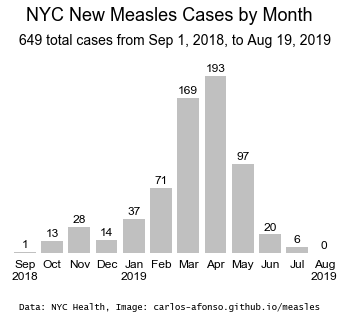

In [8]:
# Define font parameters
fn = 'Arial' # font name
fsb = 12     # font size base

# Create figure
fig = plt.figure()

# Add "figure title"
fig.suptitle('NYC New Measles Cases by Month', fontname=fn, fontsize=(fsb + 6))

# Add space between the "figure title" and the plot to create space for the "plot title".
# If we don't add this space the "figure title" and the "plot title" will overlap. 
fig.subplots_adjust(top = 0.77)

# Add "plot title" which we will be using as the "figure sub-title"
subtitle = str(total_cases) + ' total cases from ' + start_date + ', to ' + end_date + '\n'
plt.title(subtitle, fontname=fn, fontsize=(fsb + 2))

# Define colors to distingusih the current from the previous months,
# because the current month is incomplete and therefore is likelly to
# get more cases in the next data update.
whole_month_color = 'silver'
partial_month_color = 'wheat'

# Define the bar colors
bar_colors = [whole_month_color]*(len(d2p) - 1) + [partial_month_color]

# Create the horizontal bar chart
ax = d2p.plot.bar(color=bar_colors, width=0.8)

# Add legend
#ax.legend(handles=[
#    mpatches.Patch(color=whole_month_color, label='Whole month'),
#    mpatches.Patch(color=partial_month_color, label='Partial month')
#])

# Remove the y-axis ticks and labels/values
#ax.get_yaxis().set_ticks([])
ax.set_yticks([])

# Remove the x-axis ticks
ax.xaxis.set_ticks_position('none')

# Set the x-axis labels
ax.set_xticklabels(month_labels, fontname=fn, fontsize=fsb, rotation=0)

# Create the labels on top of the bars to explicitly show the
# number of new measles cases in each month
for i in ax.patches:
    ax.text(
        i.get_x() + 0.4,
        i.get_height() + 5,
        str(i.get_height()), 
        fontname=fn,
        fontsize=fsb,
        horizontalalignment='center'
    )

# Remove the axes box
plt.box(False)

# Add text about the Data and Image sources
sources = 'Data: NYC Health, Image: carlos-afonso.github.io/measles'
fig.text(0.5, -0.07, sources, fontname='Lucida Console',
         fontsize=(fsb - 3), horizontalalignment='center')

# Show figure
plt.show()

## Save Bar Chart

In [9]:
# Set image file path/name (without file extension)
img_file = '../images/nyc-new-measles-cases-by-month-bar-chart-py'

# Save as PNG image
fig.savefig(img_file + '.png', bbox_inches='tight', dpi=200)

# Save as SVG image
fig.savefig(img_file + '.svg', bbox_inches='tight')

## Export Notebook as HTML

In [10]:
# Export this notebook as a static HTML page
os.system('jupyter nbconvert --to html nyc-new-measles-cases-by-month.ipynb')

0